In [6]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import scipy

In [7]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [8]:
log_dirs = [
    #'/home/gasanoe/HOME_SCRATCH_FOLDER/unlearning/logs/model_resnet18_lr_0.1_untrain07-24-14:34:39_SCRUB'
    '/home/gasanoe/HOME_SCRATCH_FOLDER/unlearning/logs/model_resnet18_lr_0.025_untrain07-24-15:52:07_constrained_lagrange'
    ]

In [9]:
markers = ['*', 'd', 'o', '>', '.', '<', 'D']

# Downloading the dataset

In [10]:
import data

In [11]:
dataset_handler = data.CIFAR100Handler(batch_size=128,
                                       validation_split=0.1,
                                       random_seed=42,
                                       data_dir='/home/gasanoe/HOME_SCRATCH_FOLDER/unlearning/data/cifar100')
data_confuser = data.uniform_confuser(confuse_level=.0, random_seed=42)
splitter = data.mix_both_sets(
    amend_split=1.,
    retain_split=0.1,
    random_seed=42
    )
confused_dataset_handler = data.AmendedDatasetHandler(
    dataset_handler,
    data_confuser,
    splitter,
    class_wise_corr=True
    )
train_loader, val_loader, test_loader, forget_loader, retain_loader, unseen_loader = confused_dataset_handler.get_dataloaders()

Files already downloaded and verified
Files already downloaded and verified


# Accuracy @ 5 on the retained set plots

In [12]:
all_values_retain = []
for log_dir in log_dirs:
    log_dir = log_dir + '/Accuracy_train_top5_retain'
    print(log_dir)
    # Initialize the event accumulator
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()

    # Print all available tags (e.g., scalars, histograms, images, etc.)
    print(event_acc.Tags())

    # Get scalar data for a specific tag
    scalar_tag = 'Accuracy/train_top5'  # Change to the tag you are interested in
    scalar_events = event_acc.Scalars(scalar_tag)

    # Extract steps and values
    epochs = [event.step for event in scalar_events]
    values = [event.value for event in scalar_events]

    all_values_retain.append(values)

/home/gasanoe/HOME_SCRATCH_FOLDER/unlearning/logs/model_resnet18_lr_0.025_untrain07-24-15:52:07_constrained_lagrange/Accuracy_train_top5_retain
{'images': [], 'audio': [], 'histograms': [], 'scalars': ['Accuracy/train_top5'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}


In [13]:
all_values_retain

[[99.755859375,
  99.70703125,
  99.609375,
  99.609375,
  99.2431640625,
  97.802734375,
  97.265625,
  97.55859375,
  97.705078125,
  98.6083984375,
  97.705078125,
  97.9248046875,
  97.6806640625]]

# Accuracy @ 5 on the forget set

In [14]:
all_values_forget = []
for log_dir in log_dirs:
    log_dir = log_dir + '/Accuracy_train_top5_forget'
    print(log_dir)
    # Initialize the event accumulator
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()

    # Print all available tags (e.g., scalars, histograms, images, etc.)
    print(event_acc.Tags())

    # Get scalar data for a specific tag
    scalar_tag = 'Accuracy/train_top5'  # Change to the tag you are interested in
    scalar_events = event_acc.Scalars(scalar_tag)

    # Extract steps and values
    epochs = [event.step for event in scalar_events]
    values = [event.value for event in scalar_events]

    all_values_forget.append(values)

/home/gasanoe/HOME_SCRATCH_FOLDER/unlearning/logs/model_resnet18_lr_0.025_untrain07-24-15:52:07_constrained_lagrange/Accuracy_train_top5_forget
{'images': [], 'audio': [], 'histograms': [], 'scalars': ['Accuracy/train_top5'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}


In [15]:
from models import get_model
from metrics import calculate_accuracy
import torch

/ibex/scratch/gasanoe/unlearning/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
import matplotlib.colors as mcolors

In [17]:
all_values_forget = np.array(all_values_forget[0])
all_values_retain = np.array(all_values_retain[0])

In [18]:
from matplotlib.collections import PolyCollection

In [19]:
plt.rcParams.update({'font.size': 16})

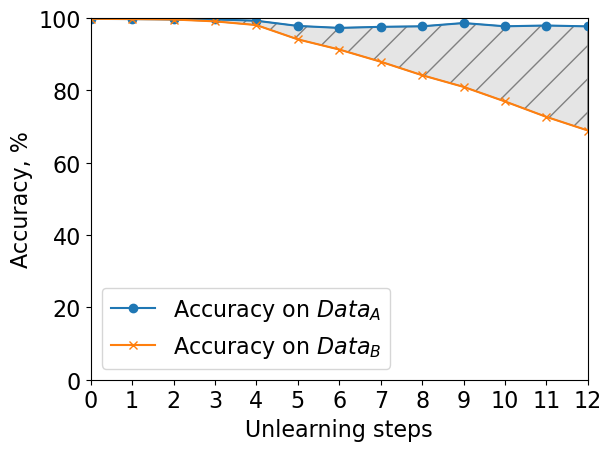

In [20]:
marker = ['o', 'x']

x = np.arange(13)

# Create the plot
fig, ax = plt.subplots()

# Plot the data
ax.plot(x, all_values_retain, label=r'Accuracy on $Data_A$', marker=marker[0])
ax.plot(x, all_values_forget, label=r'Accuracy on $Data_B$', marker=marker[1])

# Fill the space between the two lines with angled lines (hatching)
ax.fill_between(x, all_values_retain, all_values_forget, color=(0.5, 0.5, 0.5, 0.2), hatch='/', edgecolor='gray')

# Labels and grid
ax.set_xlabel('Unlearning steps')
ax.set_ylabel('Accuracy, %')
ax.set_ylim(bottom=0, top=100)
# ax.grid()
ax.set_xlim(left=0, right=12)
ax.set_xticks(np.arange(0, 13, 1))
ax.legend()
plt.tight_layout()

# Save or show the plot
# plt.savefig('plots/scrub_plot_for_presentation.pdf')
# plt.savefig('plots/constrained_plot_for_presentation.pdf')
plt.show()